#### ПР3 Случайные графы и их свойства

In [72]:
import math
import random
from collections import deque

import networkx as nx
import matplotlib.pyplot as plt

##### Генерация случайного графа

Создание функции `generate_graph`, которая реализует генерацию случайного графа на основе вероятности возниконовения связи между вершинами.

In [73]:
def generate_graph(
    n: int,
    k: int = 1,
    *,
    freeze_seed: bool = True,
) -> list[list[int]]:
    if freeze_seed:
        random.seed(42)

    adj_matrix = [[0 for _ in range(n)] for _ in range(n)]
    lifetime = [1]

    for new_v in range(1, n):
        lifetime = [t + 1 for t in lifetime]

        weights = [1 / (t ** k) for t in lifetime]
        total_weight = sum(weights)
        probs = [w / total_weight for w in weights]

        parent_v = random.choices(range(new_v), weights=probs, k=1)[0]

        adj_matrix[new_v][parent_v] = 1
        adj_matrix[parent_v][new_v] = 1

        lifetime.append(1)

    return adj_matrix

Создание матрицы смежности для случайного графа  из 10 узлов и вывод ее в `stdout`.

In [74]:
adj_matrix = generate_graph(10, k=1)
print(*adj_matrix, sep="\n")

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


Визуализация полученного графа.

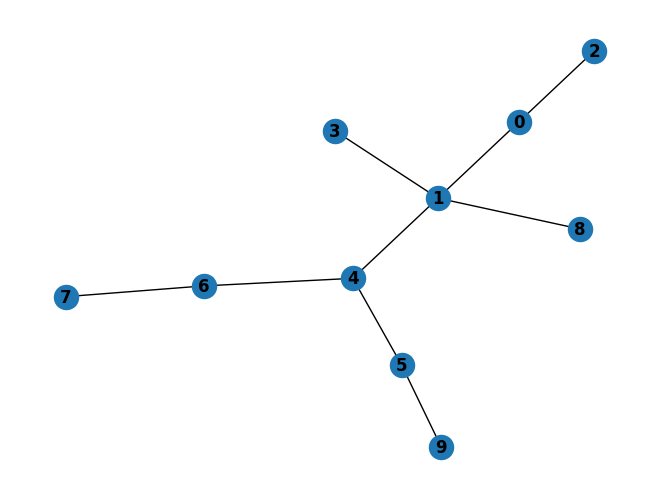

In [75]:
edges = [(i, j) for i, row in enumerate(adj_matrix) for j, it in enumerate(row) if it]

g = nx.Graph()
g.add_nodes_from(range(10))
g.add_edges_from(edges)

nx.draw_kamada_kawai(g, with_labels=True, font_weight="bold")
plt.show()

##### Поиск спектра степеней графа

Создание функции `find_graph_spectrum` для поиска спектра графа.

In [76]:
def find_graph_spectrum(adj_matrix: list[list[int]]) -> dict[int, int]:
    return {
        v: sum(adj_matrix[v])
        for v, _ in enumerate(adj_matrix)
    }

Расчет спектра графа и вывод результатов в виде гистограммы.

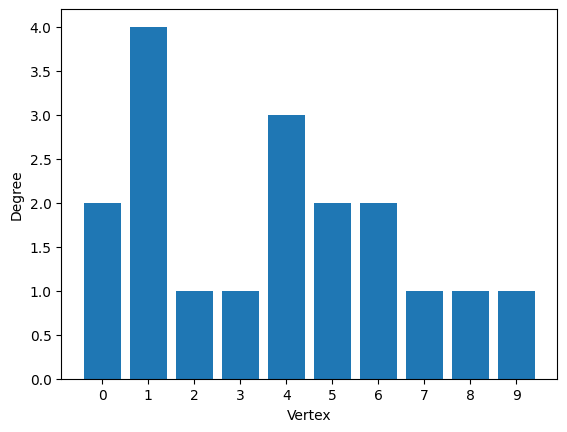

In [77]:
spectrum = find_graph_spectrum(adj_matrix)

plt.bar(
    x=spectrum.keys(),
    height=spectrum.values(),
)
plt.xticks(range(len(spectrum.keys())))
plt.xlabel("Vertex")
plt.ylabel("Degree")
plt.show()

##### Построение графика зависимости среднего диаметра графа от количества вершин при k = [1...4]

Создание функции `get_tree_diameter` для расчета диаметра графа.

In [78]:
def bfs(adj_matrix: list[list[int]], from_vertex: int) -> tuple[int, int]:
    n = len(adj_matrix)
    visited = [False] * n
    distances = [0] * n

    queue = deque([from_vertex])
    visited[from_vertex] = True

    farthest_node = from_vertex
    max_distance = 0

    while queue:
        current = queue.popleft()
        for neighbor, connected in enumerate(adj_matrix[current]):
            if connected and not visited[neighbor]:
                visited[neighbor] = True
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)
                if distances[neighbor] > max_distance:
                    max_distance = distances[neighbor]
                    farthest_node = neighbor

    return farthest_node, max_distance


def get_tree_diameter(adj_matrix: list[list[int]]) -> int:
    far_node, _ = bfs(adj_matrix, 0)
    _, diameter = bfs(adj_matrix, far_node)
    return diameter

Создание функции `get_diameters` для расчета диаметров графов для разного количества вершин и заданного значения `k`.

In [79]:
N_GRAPHS = 100


def get_diameters(k: int) -> list[int]:
    return [
        sum(get_tree_diameter(generate_graph(n, k, freeze_seed=False)) for _ in range(N_GRAPHS)) // N_GRAPHS
        for n in range(5, 105, 5)
    ]

Создание функции `draw_diameters_plot` для вывода графика зависимости диаметра графа от количества вершин.

In [80]:
def draw_diameters_plot(k: int, diameters: list[int]) -> None:
    plt.plot(
        range(5, 105, 5),
        diameters,
        marker=".",
    )
    plt.title(f"k = {k}")
    plt.xlabel("Nodes")
    plt.ylabel("Diameter")
    plt.xticks(range(5, 105, 5))
    plt.yticks(range(0, 71, 5))
    plt.grid(True)
    plt.show()

Вывод графика для `k = 1`.

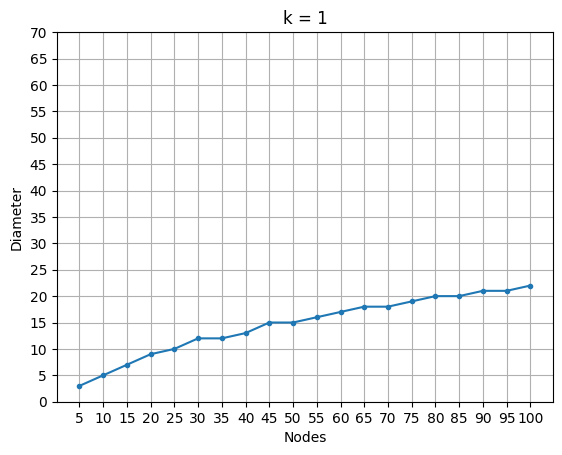

In [81]:
draw_diameters_plot(1, get_diameters(1))

Вывод графика для `k = 2`.

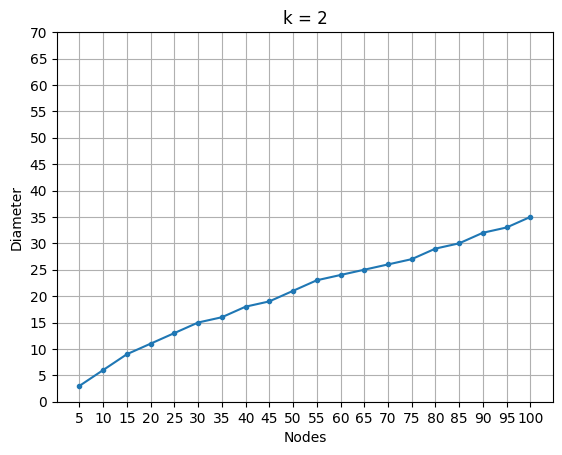

In [82]:
draw_diameters_plot(2, get_diameters(2))

Вывод графика для `k = 3`.

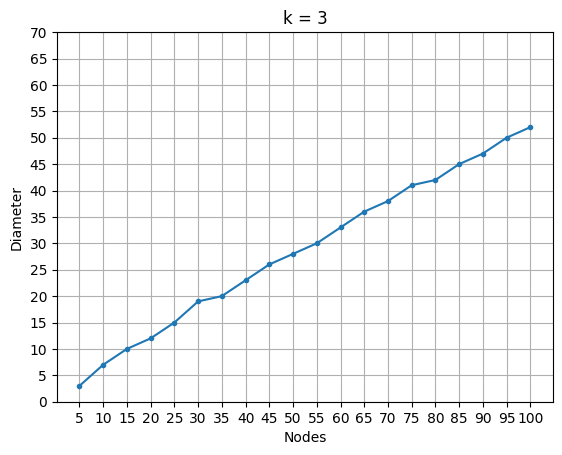

In [83]:
draw_diameters_plot(3, get_diameters(3))

Вывод графика для `k = 4`.

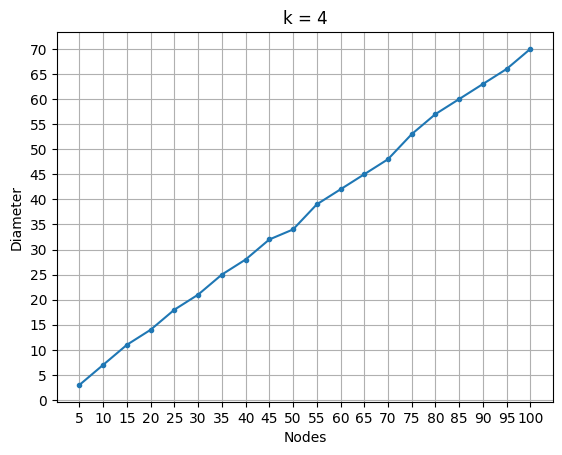

In [84]:
draw_diameters_plot(4, get_diameters(4))